In [1]:
from resolved_pol import ResolvedPol

In [2]:
object = "W0204-0506"
band = "R_SPECIAL"
mjds = [60207, 60209, "All"]

star_ex_ref = 1012.7
star_ey_ref = 54.8

#We'll use the source itself for pointing offsets. 
source_ex_ref =  1021.5
source_ey_ref = 70.5

mkdir: stamps: File exists


-0.0 -90.5


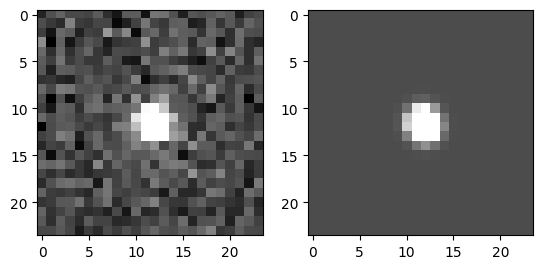

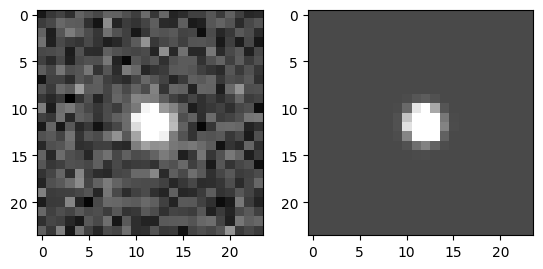

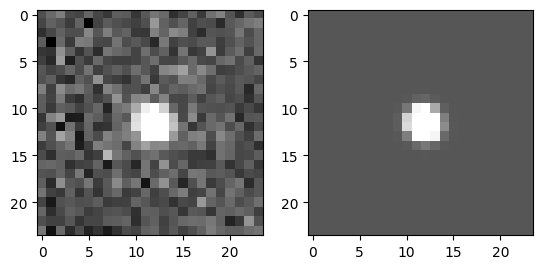

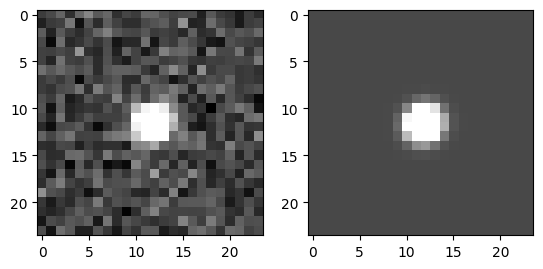

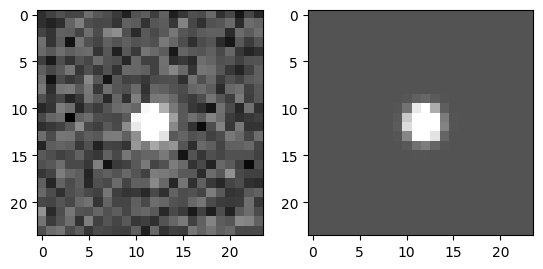

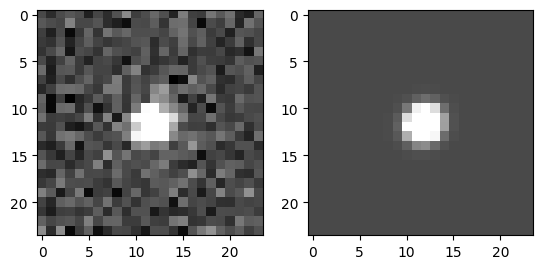

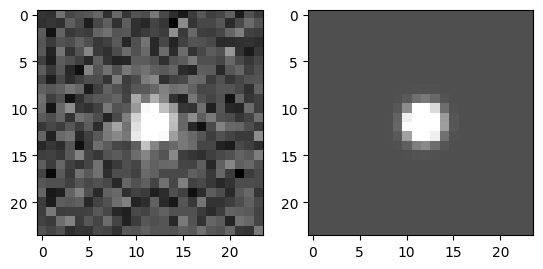

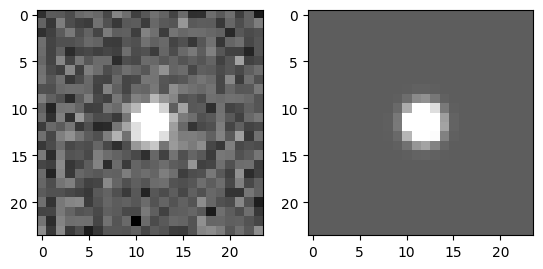

[0.56393525 0.54672711 0.52859855 0.65634692 0.55132156 0.62581587
 0.63786156 0.66430646]
Target FWHM:  0.7
0.6988387278032016 0.1761073594064068


0.7366481586420904 0.1856353359778068


0.7733106315116267 0.19487427914092995


0.41004789578253953 0.10333206973719997


0.726859031117387 0.18316847584158152


0.5284925248220912 0.13318011625516699


0.48587829500328594 0.12244133034082806


0.37187115248082203 0.09371153042516715


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/Resolved_Polarization/resolved_pol.py:220: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -90.4


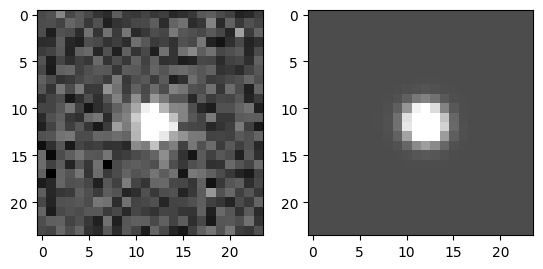

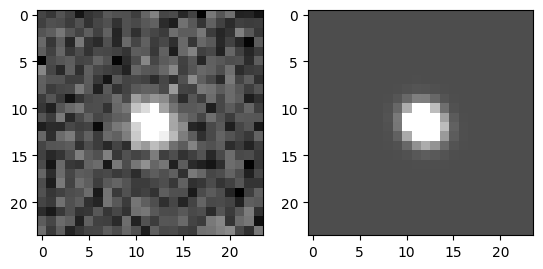

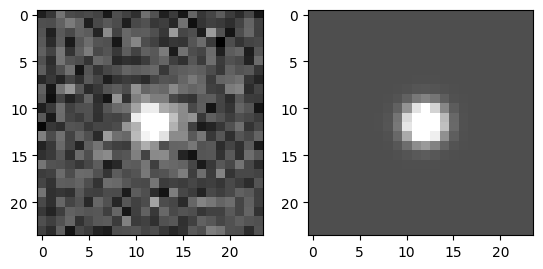

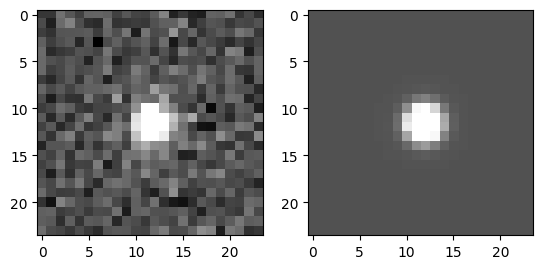

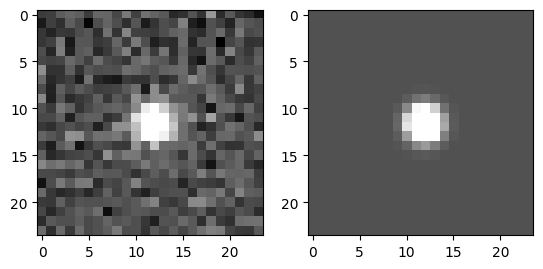

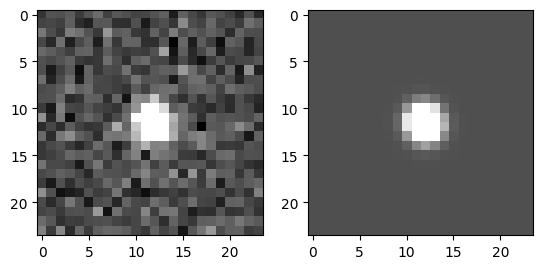

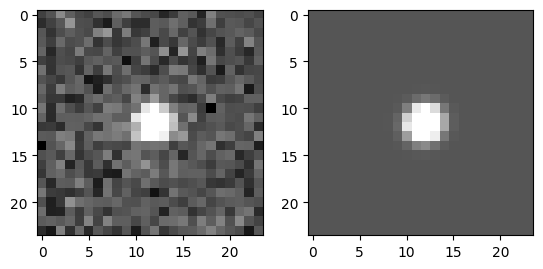

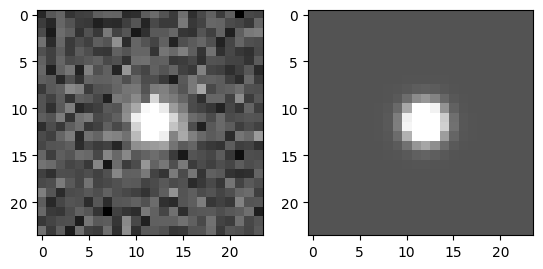

[0.76174859 0.74936518 0.78844463 0.69458375 0.67022864 0.67293635
 0.63460052 0.7891137 ]
Target FWHM:  0.8
0.41188031935515573 0.10379384047749925


0.47200139765758636 0.11894435220971177


0.22830723014107823 0.05753342199555171


0.6688914442999001 0.16856064396357484


0.7360775931440674 0.18549155347230498


0.7290283006554005 0.1837151317651609


0.8208698388467891 0.20685919938939085


0.22164574706750798 0.05585472826101201


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/Resolved_Polarization/resolved_pol.py:220: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.0 -90.5


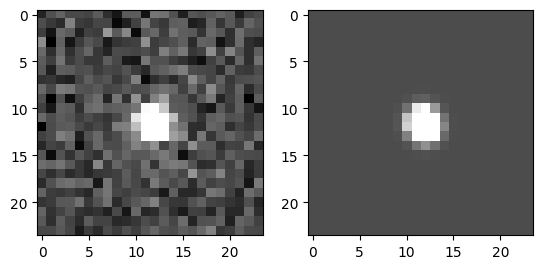

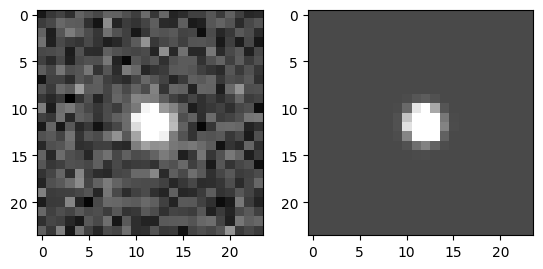

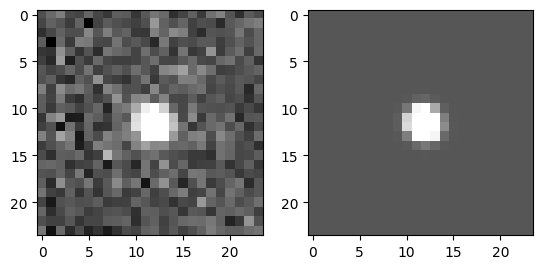

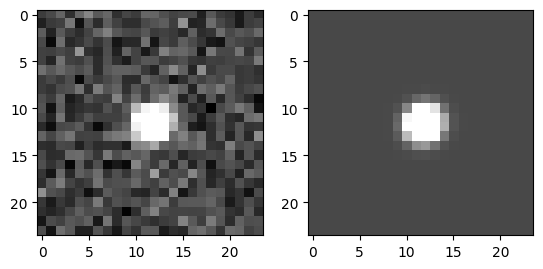

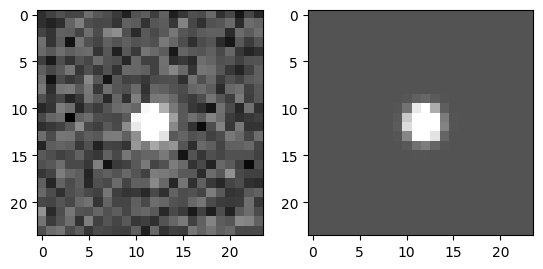

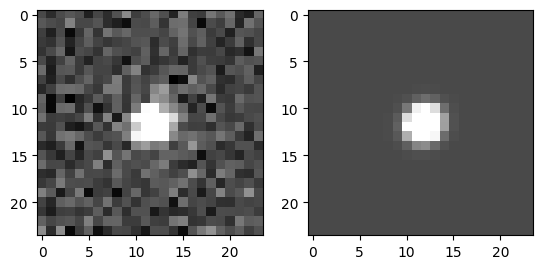

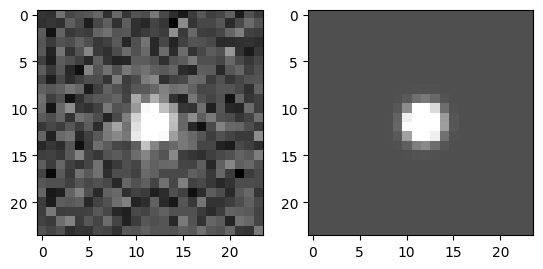

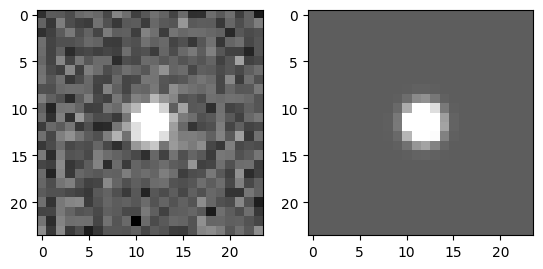

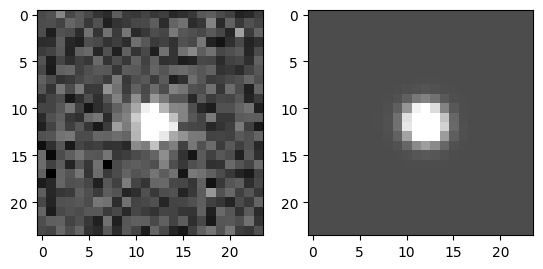

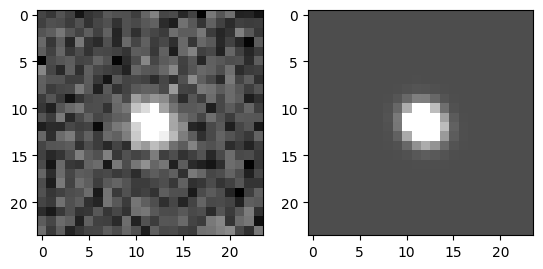

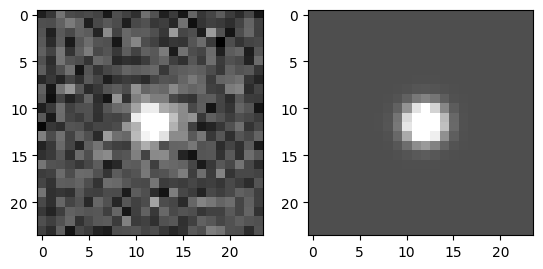

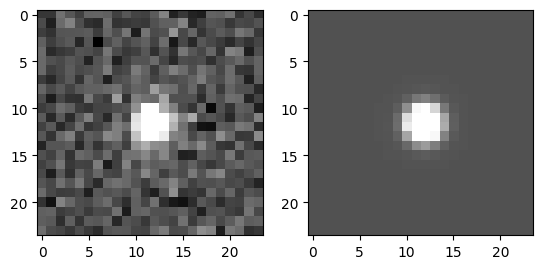

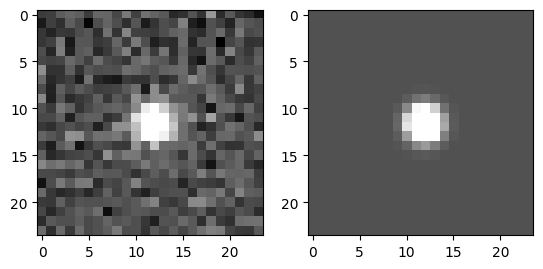

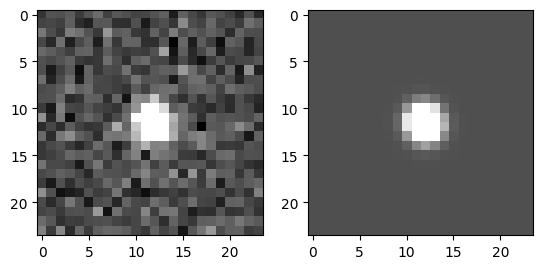

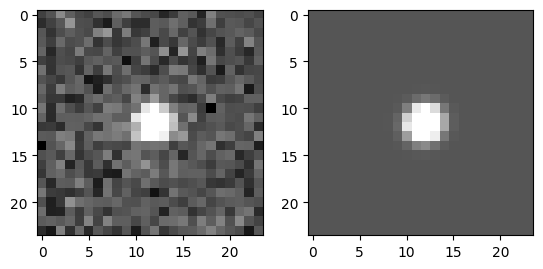

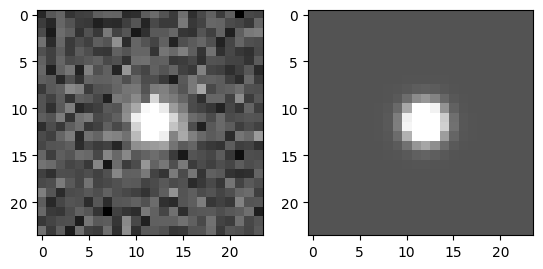

[0.56393525 0.54672711 0.52859855 0.65634692 0.55132156 0.62581587
 0.63786156 0.66430646 0.76174859 0.74936518 0.78844463 0.69458375
 0.67022864 0.67293635 0.63460052 0.7891137 ]
Target FWHM:  0.8
0.9562119875687365 0.2409654208673216


0.9841830659604638 0.24801413262203686


1.0119165630137037 0.2550029738794533


0.7707821187133524 0.19423709391576482


0.9768776017544177 0.24617315564211328


0.839803635670497 0.21163051618896525


0.8136605651301139 0.2050424624127887


0.7511683910681884 0.1892944345491835


0.41188031935515573 0.10379384047749925


0.47200139765758636 0.11894435220971177


0.22830723014107823 0.05753342199555171


0.6688914442999001 0.16856064396357484


0.7360775931440674 0.18549155347230498


0.7290283006554005 0.1837151317651609


0.8208698388467891 0.20685919938939085


0.22164574706750798 0.05585472826101201


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/Resolved_Polarization/resolved_pol.py:220: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)


In [3]:
rpos = list()
for mjd in mjds:
    rpo = ResolvedPol(object=object, band=band, mjd=mjd)
    rpo.find_shift(ex_ref=source_ex_ref, ey_ref=source_ey_ref)
    print(rpo.dx_use, rpo.dy_use)

    rpo.find_seeing(ex_ref=star_ex_ref, ey_ref=star_ey_ref, show_plots=True)
    print(rpo.seeing)

    rpo.get_pol(regularize_psf=True)

    rpos.append(rpo)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

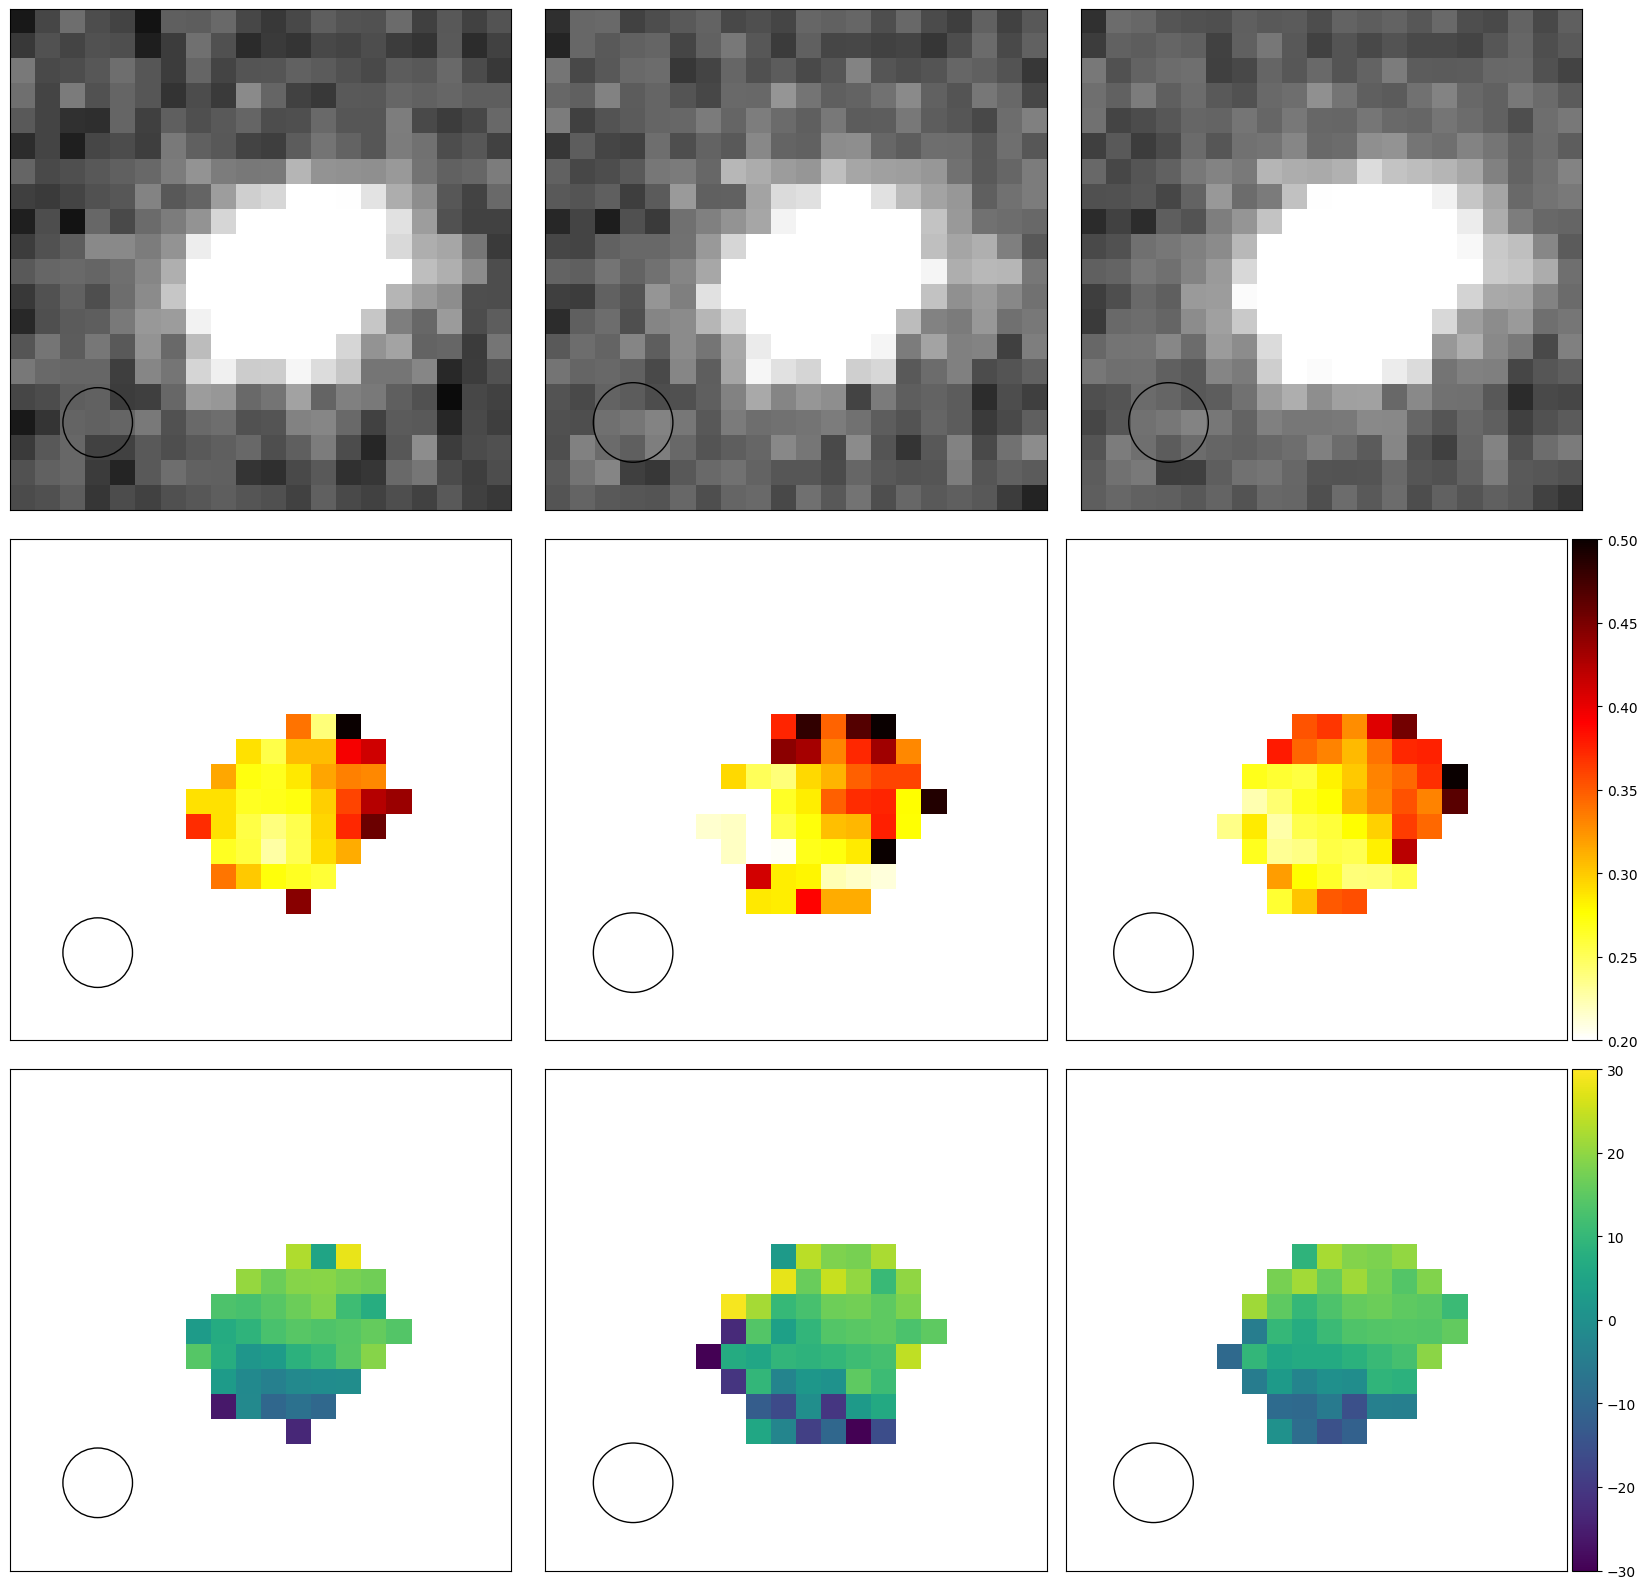

In [5]:
fig, axs = plt.subplots(3,3,figsize=(17,16), sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0., wspace=0.)
plt.subplots_adjust(wspace=0.)
for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])


stack1 = rpos[0].stack[1]
size = 20
ix1 = int(rpos[0].stack.shape[1]/2 - size/2)
ix2 = int(rpos[0].stack.shape[1]/2 + size/2)
iy1 = int(rpos[0].stack.shape[0]/2 + size/2)
iy2 = int(rpos[0].stack.shape[0]/2 - size/2)
#print(ix1, ix2, iy1, iy2)

norm1 = ImageNormalize(rpos[0].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,0].imshow(rpos[0].stack[iy1:iy2:-1,ix1:ix2], norm=norm1, cmap='gray')

norm2 = ImageNormalize(rpos[1].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,1].imshow(rpos[1].stack[iy1:iy2:-1,ix1:ix2], norm=norm2, cmap='gray')

norm3 = ImageNormalize(rpos[2].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,2].imshow(rpos[2].stack[iy1:iy2:-1,ix1:ix2], norm=norm3, cmap='gray')

axs[1,0].imshow(rpos[0].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.2, vmax=0.5)
axs[1,1].imshow(rpos[1].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.2, vmax=0.5)
cm_pf = axs[1,2].imshow(rpos[2].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.2, vmax=0.5)
divider_pf = make_axes_locatable(axs[1,2])
cax_pf = divider_pf.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pf, cax=cax_pf)

axs[2,0].imshow(rpos[0].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-30, vmax=30)
axs[2,1].imshow(rpos[1].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-30, vmax=30)
cm_pa = axs[2,2].imshow(rpos[2].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-30, vmax=30)
divider_pa = make_axes_locatable(axs[2,2])
cax_pa = divider_pa.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pa, cax=cax_pa)

for j in range(3):
    for i in range(3):
        beam  = plt.Circle((size*0.15,size*0.8),rpos[i].target_fwhm_pix/2, color='k', fill=False)
        axs[j,i].add_patch(beam)
        
fig.tight_layout()
plt.show()